In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

## models
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier,BaseEnsemble,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve,accuracy_score
from sklearn.metrics import roc_curve

In [54]:
df=pd.read_csv("G:\\ML\\titanic\\TITANIC\\titanic.csv")

In [55]:
warnings.filterwarnings('ignore')

# exploratory data analysis (EDA)

In [56]:
df.head().style.background_gradient(cmap='Blues')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [58]:
df.describe().T.style.background_gradient(cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.000000,655.000000,378.020061,1.000000,328.000000,655.000000,982.000000,1309.000000
Survived,1309.000000,0.377387,0.484918,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,1309.000000,2.294882,0.837836,1.000000,2.000000,3.000000,3.000000,3.000000
Age,1046.000000,29.881138,14.413493,0.170000,21.000000,28.000000,39.000000,80.000000
SibSp,1309.000000,0.498854,1.041658,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,1309.000000,0.385027,0.865560,0.000000,0.000000,0.000000,0.000000,9.000000
Fare,1309.000000,33.270043,51.747063,0.000000,7.895800,14.454200,31.275000,512.329200


In [59]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

correlation between features

<AxesSubplot:>

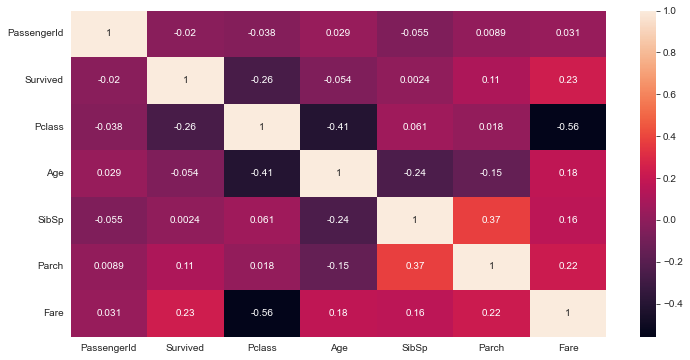

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

the percentage of categories in gender, Embarked & Pclass

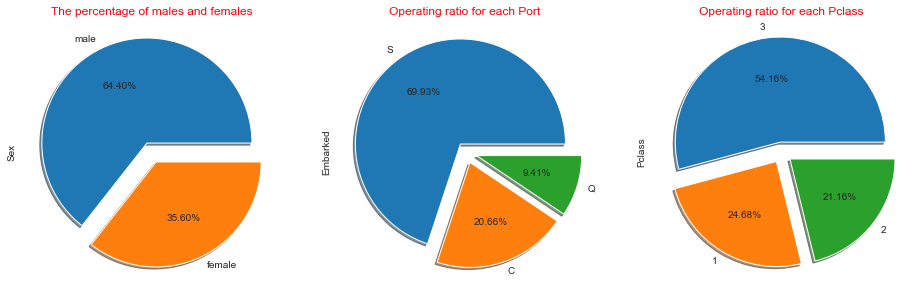

In [61]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of males and females',color='Red',loc='center');

plt.subplot(1,3,2)
df['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('Operating ratio for each Port ',color='Red',loc='center');

plt.subplot(1,3,3)
df['Pclass'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('Operating ratio for each Pclass',color='Red',loc='center');

analysis of survival according to gender

In [62]:
df[df.Survived==0].Sex.value_counts(),df[df.Survived==1].Sex.value_counts()

(male      629
 female    186
 Name: Sex, dtype: int64,
 female    280
 male      214
 Name: Sex, dtype: int64)

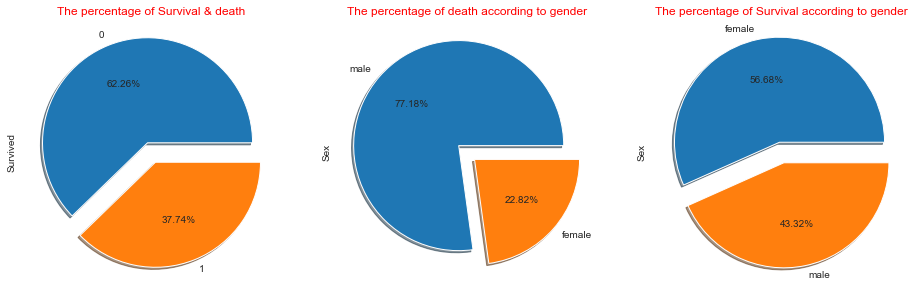

In [63]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
df['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of Survival & death',color='Red',loc='center');

plt.subplot(1,3,2)
df[df['Survived']==0]['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of death according to gender',color='Red',loc='center');

plt.subplot(1,3,3)
df[df['Survived']==1]['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of Survival according to gender',color='Red',loc='center');


analysis of survival according to port

In [64]:
df[df.Survived==0].Embarked.value_counts(),df[df.Survived==1].Embarked.value_counts()

(S    609
 C    137
 Q     69
 Name: Embarked, dtype: int64,
 S    305
 C    133
 Q     54
 Name: Embarked, dtype: int64)

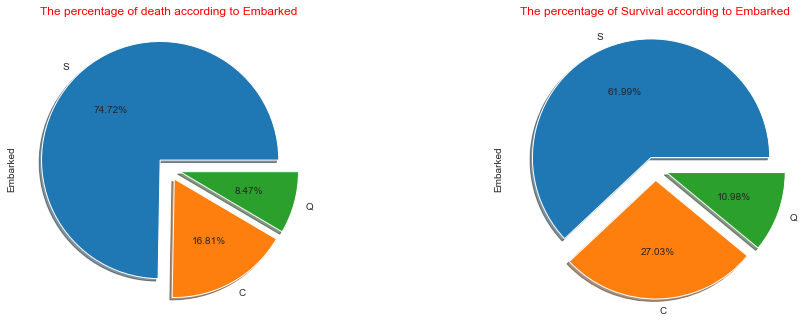

In [65]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
df[df['Survived']==0]['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of death according to Embarked',color='Red',loc='center')

plt.subplot(2,2,2)
df[df['Survived']==1]['Embarked'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of Survival according to Embarked',color='Red',loc='center');


analysis of survival according to Pclass

In [66]:
df[df.Survived==0].Pclass.value_counts(),df[df.Survived==1].Pclass.value_counts()

(3    518
 2    160
 1    137
 Name: Pclass, dtype: int64,
 3    191
 1    186
 2    117
 Name: Pclass, dtype: int64)

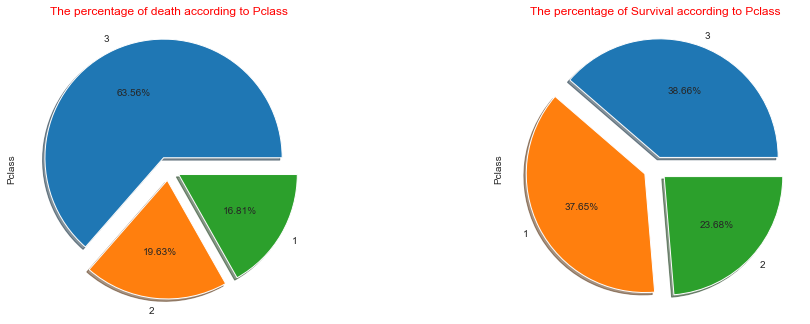

In [67]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
df[df['Survived']==0]['Pclass'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of death according to Pclass',color='Red',loc='center')

plt.subplot(2,2,2)
df[df['Survived']==1]['Pclass'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of Survival according to Pclass',color='Red',loc='center');


The percentage of Survival & death according to SibSp

In [68]:
df[df.Survived==0].SibSp.value_counts(),df[df.Survived==1].SibSp.value_counts()

(0    593
 1    153
 2     23
 4     18
 3     15
 8      8
 5      5
 Name: SibSp, dtype: int64,
 0    298
 1    166
 2     19
 3      5
 4      4
 5      1
 8      1
 Name: SibSp, dtype: int64)

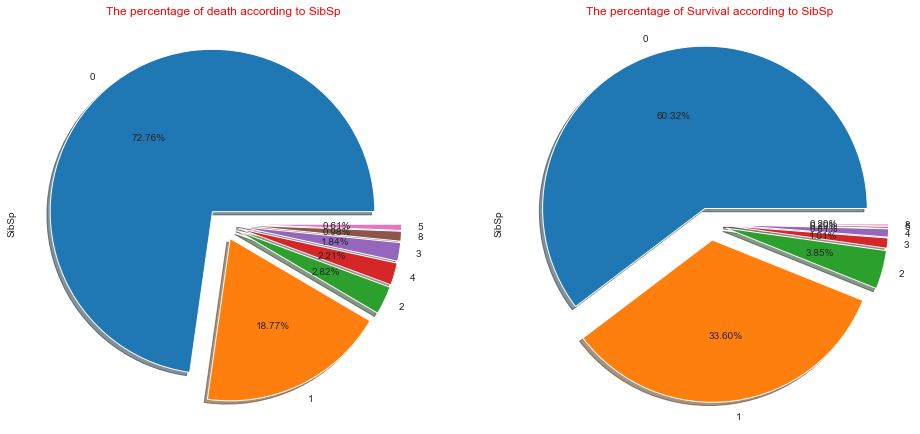

In [69]:
plt.figure(figsize=(16,20))

plt.subplot(2,2,1)
df[df['Survived']==0]['SibSp'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of death according to SibSp',color='Red',loc='center')

plt.subplot(2,2,2)
df[df['Survived']==1]['SibSp'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of Survival according to SibSp',color='Red',loc='center');

The percentage of Survival & death according to Parch

In [70]:
df[df.Survived==0].Parch.value_counts(),df[df.Survived==1].Parch.value_counts()

(0    670
 1     77
 2     53
 5      5
 4      4
 3      3
 6      2
 9      1
 Name: Parch, dtype: int64,
 0    332
 1     93
 2     60
 3      5
 4      2
 5      1
 9      1
 Name: Parch, dtype: int64)

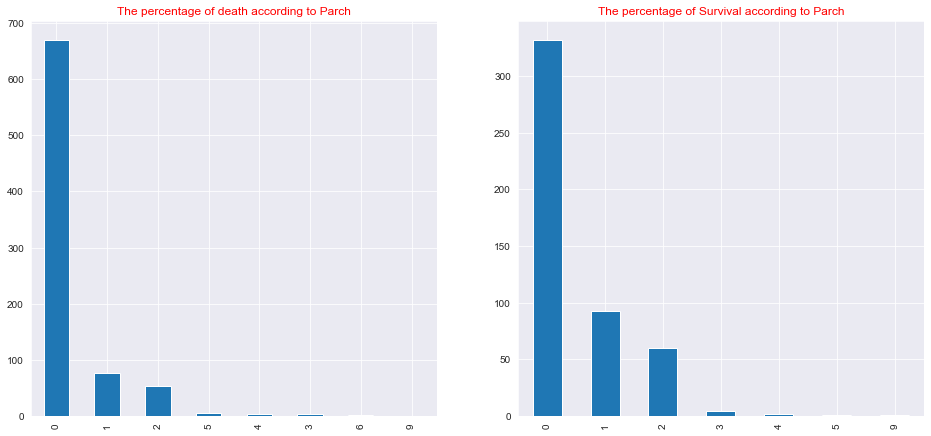

In [71]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
df[df['Survived']==0]['Parch'].value_counts().plot.bar()
plt.title('The percentage of death according to Parch',color='Red',loc='center')

plt.subplot(2,2,2)
df[df['Survived']==1]['Parch'].value_counts().plot.bar()
plt.title('The percentage of Survival according to Parch',color='Red',loc='center');

analysis of pclass according to gender

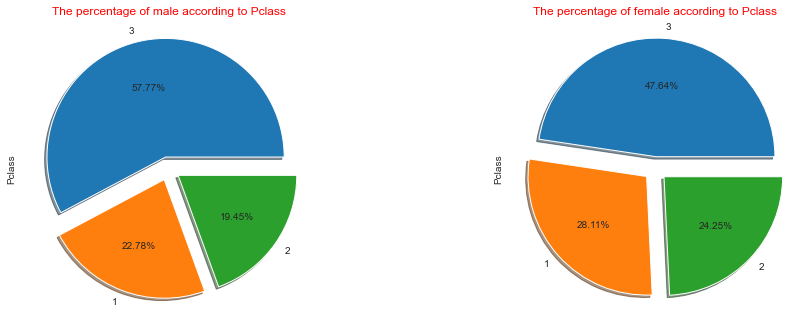

In [72]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
df[df['Sex']=='male']['Pclass'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of male according to Pclass',color='Red',loc='center')

plt.subplot(2,2,2)
df[df['Sex']=='female']['Pclass'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('The percentage of female according to Pclass',color='Red',loc='center');

Fare relative to age

<AxesSubplot:xlabel='Age', ylabel='Fare'>

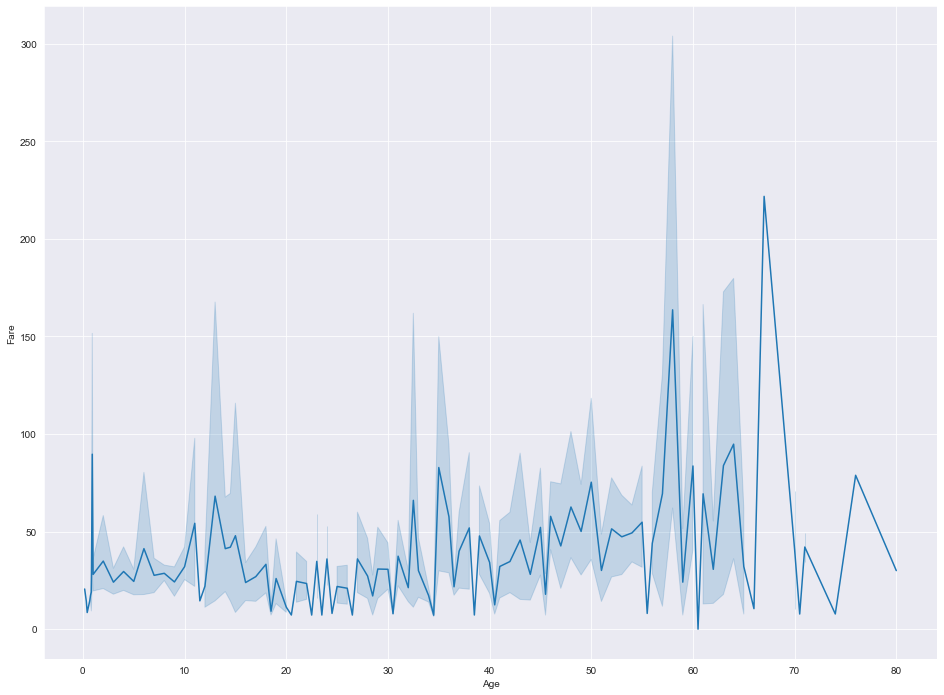

In [73]:
plt.figure(figsize=(16,12))
sns.set_style("darkgrid")
sns.lineplot(data=df,x='Age',y='Fare')

# feature engineering

# Name

In [74]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [75]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
df['Title'] = df['Title'].map(title_mapping)

In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",female,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",male,39.0,0,0,PC 17758,108.9000,C105,C,3
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


# sex

In [77]:
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)

# Age

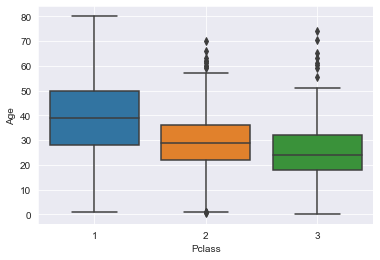

In [78]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.grid(True)

In [79]:
def imput_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if (pd.isnull(Age)):
        
        if (Pclass==1):  
            return 37
        elif (Pclass==2):
            return 29
        else: 
            return 24
    else:
        return Age       

In [80]:
df['Age']=df[['Age','Pclass']].apply(imput_age,axis=1)
df.isna().Age.sum()       

0

<AxesSubplot:xlabel='Age'>

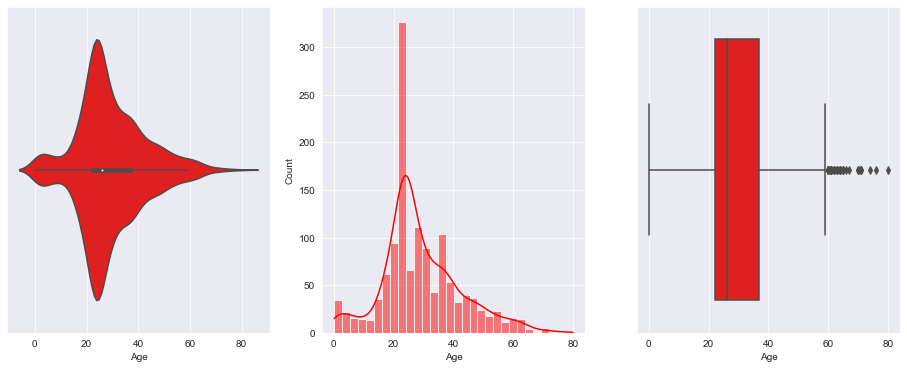

In [81]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.violinplot(data=df,x='Age',color='red')

plt.subplot(1,3,2)
sns.histplot(data=df,x='Age',kde=True,color='red')

plt.subplot(1,3,3)
sns.boxplot(data=df,x='Age',color='red')


In [82]:
### replace outliers with mean

In [83]:
median = df.loc[df['Age']<=58, 'Age'].median()
df.loc[df.Age >= 58, 'Age'] = np.nan
df.fillna(median,inplace=True)

<AxesSubplot:xlabel='Age'>

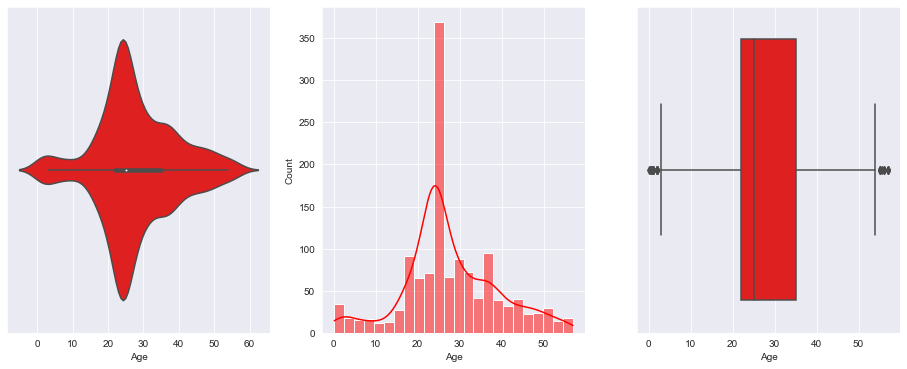

In [84]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.violinplot(data=df,x='Age',color='red')

plt.subplot(1,3,2)
sns.histplot(data=df,x='Age',kde=True,color='red')

plt.subplot(1,3,3)
sns.boxplot(data=df,x='Age',color='red')


# Fare

<AxesSubplot:xlabel='Fare'>

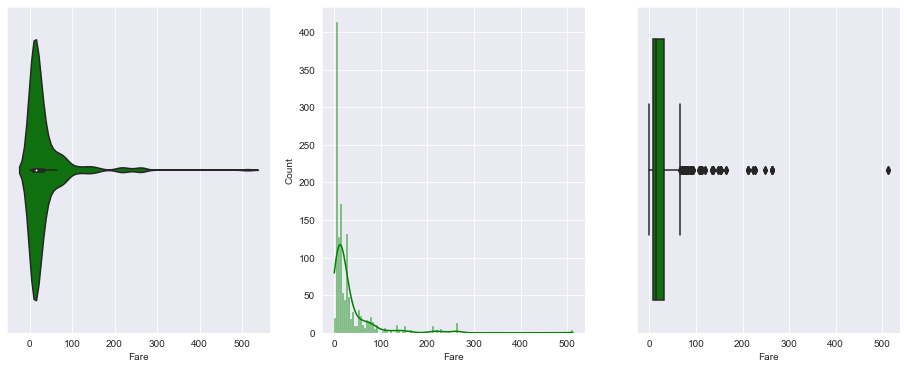

In [85]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(data=df,x='Fare',color='green')

plt.subplot(1,3,2)
sns.histplot(data=df,x='Fare',kde=True,color='green')

plt.subplot(1,3,3)
sns.boxplot(data=df,x='Fare',color='green')


In [86]:
### replace outliers with mean

In [87]:
mean = df.loc[df['Fare']<=70, 'Fare'].mean()
df.loc[df.Fare >= 70, 'Fare'] = np.nan
df.fillna(mean,inplace=True)

<AxesSubplot:xlabel='Fare'>

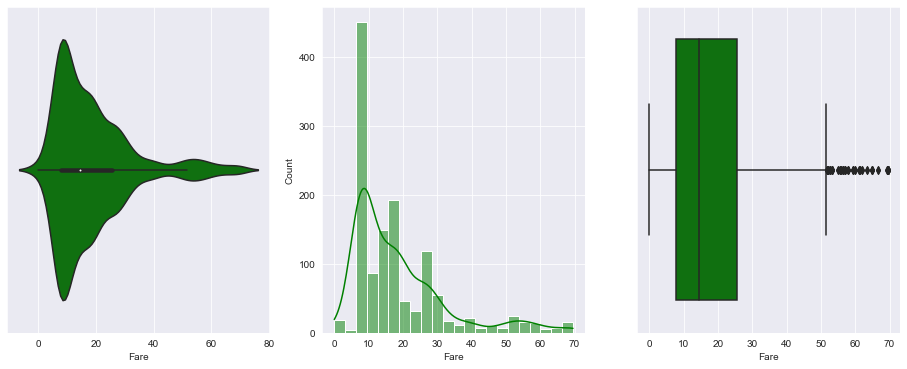

In [88]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(data=df,x='Fare',color='green')

plt.subplot(1,3,2)
sns.histplot(data=df,x='Fare',kde=True,color='green')

plt.subplot(1,3,3)
sns.boxplot(data=df,x='Fare',color='green')


# FamilySize

In [89]:
df["FamilySize"] = df["SibSp"] + df["Parch"] 

In [90]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25000,25.0,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,18.61208,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.92500,25.0,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.10000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.05000,25.0,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",1,24.0,0,0,A.5. 3236,8.05000,25.0,S,0,0
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,18.61208,C105,C,3,0
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.25000,25.0,S,0,0
1307,1308,0,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.05000,25.0,S,0,0


In [91]:
df.FamilySize.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

# convert Categorical features into numerical feature

In [92]:
## df['Sex']=[0 if item=='female' else 1 for item in df['Sex']]
## df['Embarked']=[0 if item=='S' else 1 if item=='Q'else 2 for item in df['Embarked']]

df=pd.get_dummies(df,columns=['Sex','Embarked','Pclass','Title'])

In [93]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)
df.head()

,Survived,Age,Fare,FamilySize,Sex_0,Sex_1,Embarked_25.0,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title_0,Title_1,Title_2,Title_3
0,0,22.0,7.25000,1,1,0,0,0,0,1,0,0,1,1,0,0,0
1,1,38.0,18.61208,1,0,1,0,1,0,0,1,0,0,0,0,1,0
2,1,26.0,7.92500,0,0,1,0,0,0,1,0,0,1,0,1,0,0
3,1,35.0,53.10000,1,0,1,0,0,0,1,1,0,0,0,0,1,0
4,0,35.0,8.05000,0,1,0,0,0,0,1,0,0,1,1,0,0,0


# Standardizing the data

In [94]:
x=df.drop('Survived',axis=1)
x.columns

Index(['Age', 'Fare', 'FamilySize', 'Sex_0', 'Sex_1', 'Embarked_25.0',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Title_0', 'Title_1', 'Title_2', 'Title_3'],
      dtype='object')

In [95]:
y=df.Survived

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# create train& test set 

In [97]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [98]:
print('x_train_shape: ',x_train.shape)
print('x_test_shape: ',x_test.shape)
print('y_train_shape: ',y_train.shape)
print('y_test_shape: ',y_test.shape)

x_train_shape:  (1047, 16)
x_test_shape:  (262, 16)
y_train_shape:  (1047,)
y_test_shape:  (262,)


# Cross Validation (K-fold)

In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Model Implementation


# KNN

accuracy without tuning

In [100]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82857143 0.88571429 0.87619048 0.84761905 0.84761905 0.86666667
 0.8952381  0.80769231 0.84615385 0.86538462]


In [101]:
knn_without_tuning=round(np.mean(score)*100, 2)
knn_without_tuning

85.67

accuracy with tuning

In [102]:
KNN_params={'weights':['uniform','distance','callable'],
           'algorithm':['auto','ball_tree','kd_tree','brute'],
           'metric':['str','callable','minkowski'],
           'p':[1,2],
           'n_neighbors':list(range(14))}

In [103]:
knn_clf=KNeighborsClassifier()
knn_clf_cv=GridSearchCV(knn_clf,KNN_params,cv=10)
knn_clf_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['str', 'callable', 'minkowski'],
                         'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13],
                         'p': [1, 2],
                         'weights': ['uniform', 'distance', 'callable']})

In [104]:
#best score
knn_clf_cv.best_score_

0.8615384615384617

In [105]:
#best parameters
knn_clf_cv.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 6,
 'p': 1,
 'weights': 'uniform'}

In [106]:
knn_tuned =KNeighborsClassifier(algorithm='auto',metric="minkowski",n_neighbors= 6,
                                 p=1,weights='uniform').fit(x_train,y_train)
knn_tuned.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [107]:
knn_accuracy = cross_val_score(knn_tuned, x_train, y_train, cv=10)
print("Average Accuracy: {:.2f} %".format(knn_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(knn_accuracy.std()*100))

Average Accuracy: 86.15 %
Standart Deviation of Accuracies: 2.69 %


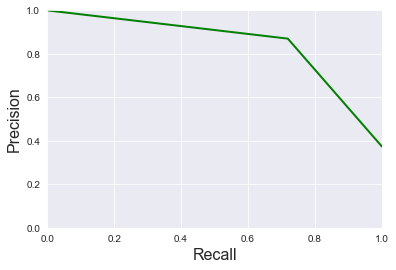

In [108]:
### precision-recall curve
y_scores = cross_val_predict(knn_tuned, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
plot_precision_vs_recall(precisions, recalls)
plt.show()

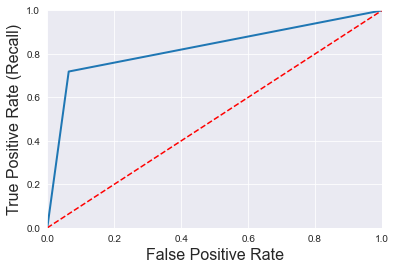

In [109]:
### ROC curve
fpr_knn, tpr_knn, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr_knn, tpr_knn, label=None):
    plt.plot(fpr_knn, tpr_knn, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 
plot_roc_curve(fpr_knn, tpr_knn)
plt.show()

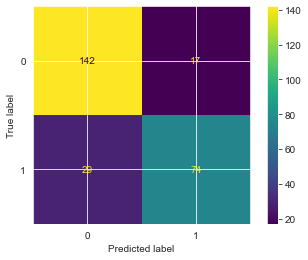

In [110]:
### Confusion Matrix
y_test_pred=knn_tuned.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [111]:
knn_acc_pred=accuracy_score(y_test,y_test_pred)
knn_acc_pred

0.8244274809160306

# Ramdom Forest

accuracy without tuning

In [112]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81904762 0.82857143 0.85714286 0.81904762 0.87619048 0.86666667
 0.85714286 0.79807692 0.79807692 0.84615385]


In [114]:
# Random Forest Score
forest_without_tuning=round(np.mean(score)*100, 2)
forest_without_tuning

83.66

accuracy with tuning

In [115]:
forest_param = [{'n_estimators': [50, 100, 1000], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False],'max_features': [10, 5, 7]}]

In [116]:
forest_clf=RandomForestClassifier()
forest_clf_cv=GridSearchCV(forest_clf,forest_param,cv=10)
forest_clf_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [50, 100, 1000]},
                         {'bootstrap': [False], 'max_features': [10, 5, 7]}])

In [117]:
#best score
forest_clf_cv.best_score_

0.8633791208791208

In [118]:
#best parameters
forest_clf_cv.best_params_

{'max_features': 4, 'n_estimators': 100}

In [119]:
forest_tuned =RandomForestClassifier(max_features=8,n_estimators= 100).fit(x_train,y_train)
forest_tuned.fit(x_train,y_train)

RandomForestClassifier(max_features=8)

In [120]:
forest_accuracy = cross_val_score(forest_tuned, x_train, y_train, cv=10)
print("Average Accuracy: {:.2f} %".format(forest_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(forest_accuracy.std()*100))

Average Accuracy: 85.58 %
Standart Deviation of Accuracies: 3.63 %


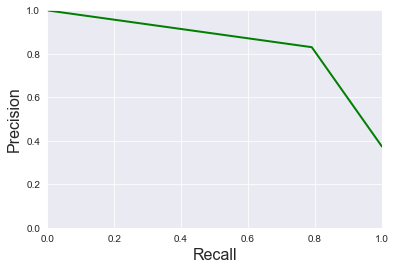

In [121]:
### precision-recall curve
y_scores = cross_val_predict(forest_tuned, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
plot_precision_vs_recall(precisions, recalls)
plt.show()

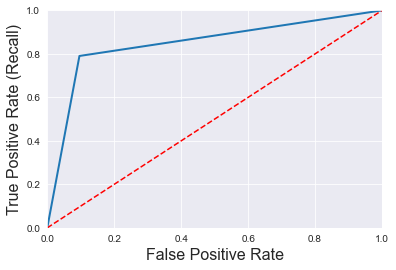

In [122]:
### ROC curve
fpr_forest, tpr_forest, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr_forest, tpr_forest, label=None):
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

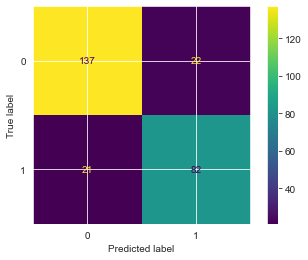

In [123]:
### Confusion Matrix
y_test_pred=forest_tuned.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [125]:
forest_acc_pred=accuracy_score(y_test,y_test_pred)
forest_acc_pred

0.8358778625954199

# SVM

accuracy without tuning

In [126]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84761905 0.86666667 0.8952381  0.86666667 0.86666667 0.86666667
 0.87619048 0.82692308 0.82692308 0.86538462]


In [128]:
svc_without_tuning=round(np.mean(score)*100,2)
svc_without_tuning

86.05

accuracy with tuning

In [129]:
SVC_param = [{'kernel': ['linear', 'poly','rbf','sigmoid'], 'degree': [1, 2, 3, 4],'C':[1,3],
    'gamma': ['scale','auto'],'decision_function_shape': ['ovo', 'ovr']}]

In [130]:
SVC_clf=SVC()
SVC_clf_cv=GridSearchCV(SVC_clf,SVC_param,cv=10)
SVC_clf_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 3],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [131]:
#best score
SVC_clf_cv.best_score_

0.8653113553113553

In [132]:
#best parameters
SVC_clf_cv.best_params_

{'C': 1,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly'}

In [133]:
SVM_tuned =SVC(C=1,decision_function_shape= 'ovo',degree=3,gamma='scale',kernel='poly').fit(x_train,y_train)
SVM_tuned.fit(x_train,y_train)

SVC(C=1, decision_function_shape='ovo', kernel='poly')

In [134]:
SVM_accuracy = cross_val_score(SVM_tuned, x_train, y_train, cv=10)
print("Average Accuracy: {:.2f} %".format(SVM_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(SVM_accuracy.std()*100))

Average Accuracy: 86.53 %
Standart Deviation of Accuracies: 2.65 %


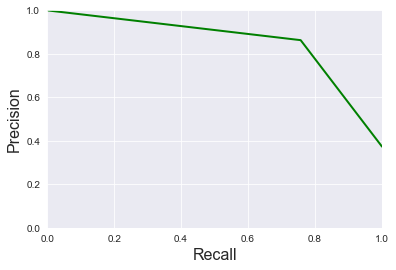

In [135]:
### precision-recall curve
y_scores = cross_val_predict(SVM_tuned, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
plot_precision_vs_recall(precisions, recalls)
plt.show()

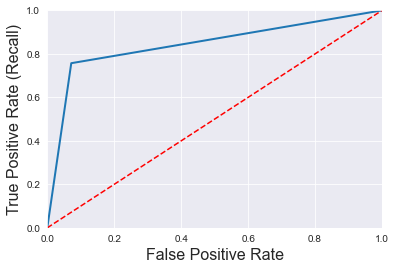

In [136]:
### ROC curve
fpr_svc, tpr_svc, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr_svc, tpr_svc, label=None):
    plt.plot(fpr_svc, tpr_svc, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 
plot_roc_curve(fpr_svc, tpr_svc)
plt.show()

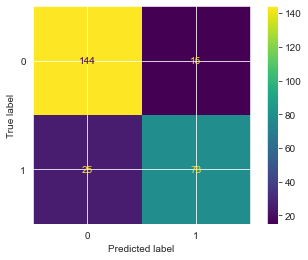

In [137]:
### Confusion Matrix
y_test_pred=SVM_tuned.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [138]:
svc_acc_pred=accuracy_score(y_test,y_test_pred)
svc_acc_pred

0.8473282442748091

# Logistic Regression

In [139]:
lg_params ={'C': [0.01, 0.03, 0.05],
                'intercept_scaling': [0.01, 0.1, 1],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
           'penalty':['l1','l2'],'max_iter':[100,500,1000]}

In [140]:
log_reg=LogisticRegression()
log_reg_cv=GridSearchCV(log_reg,lg_params,cv=10)
log_reg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.03, 0.05],
                         'intercept_scaling': [0.01, 0.1, 1],
                         'max_iter': [100, 500, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [141]:
#best score
log_reg_cv.best_score_

0.8624542124542124

In [142]:
#best parameters
log_reg_cv.best_params_

{'C': 0.05,
 'intercept_scaling': 0.01,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [143]:
logreg_tuned =LogisticRegression(C=0.05,intercept_scaling=0.01,penalty='l2',solver= 'newton-cg',max_iter=100).fit(x_train,y_train)
logreg_tuned.fit(x_train,y_train)

LogisticRegression(C=0.05, intercept_scaling=0.01, solver='newton-cg')

In [144]:
log_accuracy = cross_val_score(logreg_tuned, x_train, y_train, cv=10)
print("Average Accuracy: {:.2f} %".format(log_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(log_accuracy.std()*100))

Average Accuracy: 86.25 %
Standart Deviation of Accuracies: 2.43 %


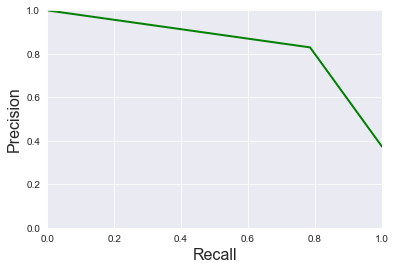

In [145]:
###precision-recall curve
y_scores = cross_val_predict(logreg_tuned, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
plot_precision_vs_recall(precisions, recalls)
plt.show()

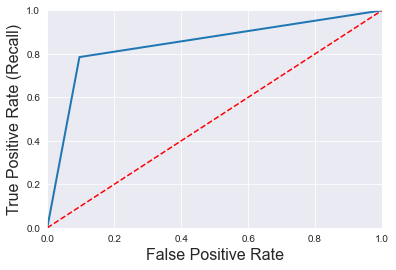

In [146]:
### ROC curve
fpr_log, tpr_log, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr_log, tpr_log, label=None):
    plt.plot(fpr_log, tpr_log, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True) 
plot_roc_curve(fpr_log, tpr_log)
plt.show()

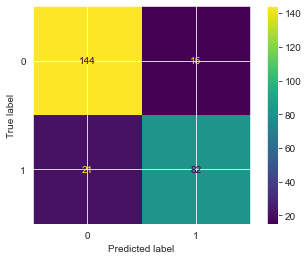

In [147]:
### Confusion Matrix
y_test_pred=logreg_tuned.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [148]:
log_acc_pred=accuracy_score(y_test,y_test_pred)
log_acc_pred

0.8625954198473282

# Gradient Boosting Classifier

In [149]:
Gradient_params={'loss':['log_loss','deviance','exponential'],
                 'learning_rate':[0.2,0.4,0.6],
                'criterion':['friedman_mse','squared_error','mse']}

In [150]:
Gradient_clf=GradientBoostingClassifier()
Gradient_clf_cv=GridSearchCV(Gradient_clf,Gradient_params,cv=10)
Gradient_clf_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.2, 0.4, 0.6],
                         'loss': ['log_loss', 'deviance', 'exponential']})

In [151]:
#best score
Gradient_clf_cv.best_score_

0.8710531135531134

In [152]:
#best parameters
Gradient_clf_cv.best_params_

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'exponential'}

In [153]:
Gradient_tuned =GradientBoostingClassifier(criterion='friedman_mse',loss="exponential",learning_rate= 0.2)
Gradient_tuned.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, loss='exponential')

In [154]:
Gradient_accuracy = cross_val_score(Gradient_tuned, x_train, y_train, cv=10)
print("Average Accuracy: {:.2f} %".format(Gradient_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(Gradient_accuracy.std()*100))

Average Accuracy: 87.01 %
Standart Deviation of Accuracies: 1.72 %


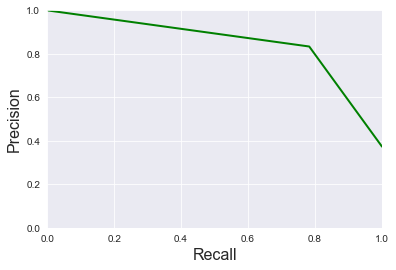

In [155]:
###precision-recall curve
y_scores = cross_val_predict(Gradient_tuned, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
plot_precision_vs_recall(precisions, recalls)
plt.show()

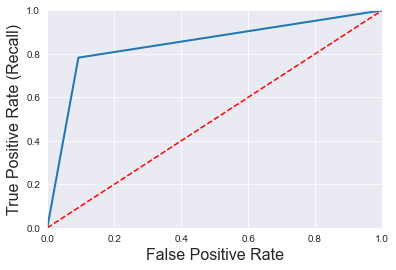

In [156]:
### ROC curve
fpr_Gradient, tpr_Gradient, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr_Gradient, tpr_Gradient, label=None):
    plt.plot(fpr_Gradient, tpr_Gradient, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 
plot_roc_curve(fpr_Gradient, tpr_Gradient)
plt.show()

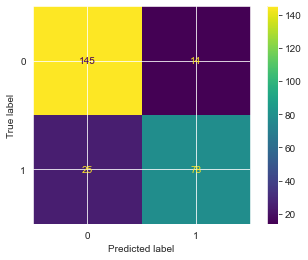

In [157]:
### Confusion Matrix
y_test_pred=Gradient_tuned.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [158]:
gradient_acc_pred=accuracy_score(y_test,y_test_pred)
gradient_acc_pred

0.851145038167939

# Gaussian Naive Bayes Model

accuracy without tuning

In [160]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.71428571 0.77142857 0.81904762 0.80952381 0.85714286 0.8
 0.73333333 0.69230769 0.78846154 0.75      ]


In [161]:
# Naive Bayes Score
gaus_without_tuning=round(np.mean(score)*100, 2)
gaus_without_tuning

77.36

accuracy with tuning

In [165]:
gaus_clf = GaussianNB(priors=None, var_smoothing=1e-09)
gaus_clf.fit(x_train, y_train)

GaussianNB()

In [166]:
gaus_accuracy = cross_val_score(gaus_clf, x_train, y_train, cv=10)
print("Average Accuracy: {:.2f} %".format(gaus_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(gaus_accuracy.std()*100))

Average Accuracy: 76.70 %
Standart Deviation of Accuracies: 2.10 %


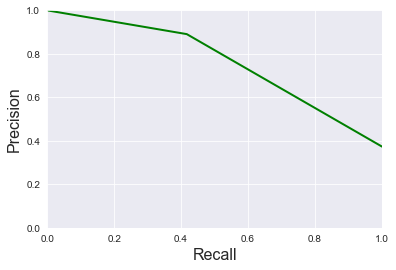

In [167]:
###precision-recall curve
y_scores = cross_val_predict(gaus_clf, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
plot_precision_vs_recall(precisions, recalls)
plt.show()

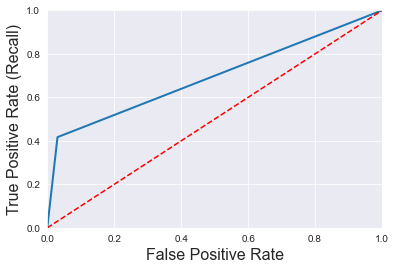

In [168]:
### ROC curve
fpr_gaus, tpr_gaus, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr_gaus, tpr_gaus, label=None):
    plt.plot(fpr_gaus, tpr_gaus, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True) 
plot_roc_curve(fpr_gaus, tpr_gaus)
plt.show()

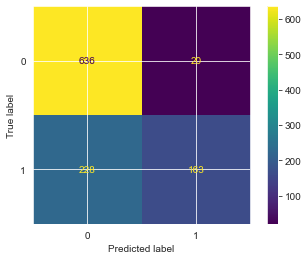

In [169]:
### Confusion Matrix
y_train_predict=cross_val_predict(gaus_clf,x_train,y_train,cv=5)
cm=confusion_matrix(y_train,y_train_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [171]:
gaus_acc_pred=accuracy_score(y_test,y_test_pred)
gaus_acc_pred

0.851145038167939

# Decision Tree

accuracy without tuning

In [174]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84761905 0.82857143 0.82857143 0.83809524 0.86666667 0.82857143
 0.82857143 0.78846154 0.84615385 0.80769231]


In [175]:
# decision tree Score
decision_without_tuning=round(np.mean(score)*100, 2)
decision_without_tuning

83.09

accuracy with tuning

In [176]:
decision_params={'criterion':['gini','entropy','log_loss'],
                 'min_samples_leaf':[1,0.4,0.6,2],
                'splitter':['best','random']}

In [177]:
decision_clf=DecisionTreeClassifier()
decision_clf_clf_cv=GridSearchCV(decision_clf,decision_params,cv=10)
decision_clf_clf_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 0.4, 0.6, 2],
                         'splitter': ['best', 'random']})

In [178]:
#best score
decision_clf_clf_cv.best_score_

0.8443223443223442

In [179]:
#best parameters
decision_clf_clf_cv.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'splitter': 'best'}

In [180]:
decision_tuned =DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2,splitter= "best")
decision_tuned.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [181]:
decision_accuracy = cross_val_score(decision_tuned, x_train, y_train, cv=10)
print("Average Accuracy: {:.2f} %".format(decision_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(decision_accuracy.std()*100))

Average Accuracy: 84.05 %
Standart Deviation of Accuracies: 3.49 %


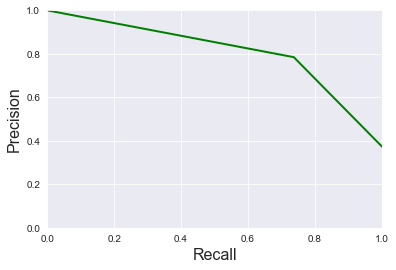

In [182]:
###precision-recall curve
y_scores = cross_val_predict(decision_tuned, x_train, y_train, cv=5)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_vs_recall(precisions, recalls):
    plt.xlabel("Recall", fontsize=16)
    plt.plot(recalls, precisions, "g-", linewidth=2)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
plot_precision_vs_recall(precisions, recalls)
plt.show()

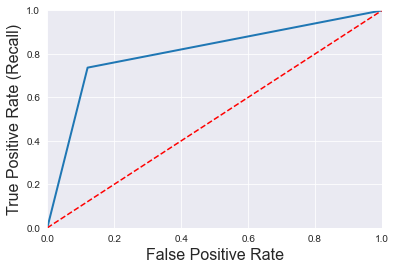

In [183]:
### ROC curve
fpr_decision, tpr_decision, thresholds = roc_curve(y_train, y_scores)
def plot_roc_curve(fpr_decision, tpr_decision, label=None):
    plt.plot(fpr_decision, tpr_decision, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 
plot_roc_curve(fpr_decision, tpr_decision)
plt.show()

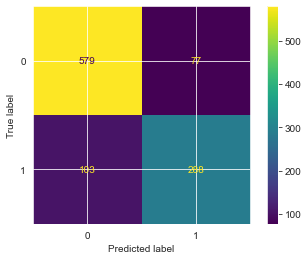

In [184]:
### Confusion Matrix
y_train_predict=cross_val_predict(decision_tuned,x_train,y_train,cv=5)
cm=confusion_matrix(y_train,y_train_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [185]:
decision_acc_pred=accuracy_score(y_test,y_test_pred)
decision_acc_pred

0.851145038167939

# compar models


<Figure size 1152x432 with 0 Axes>

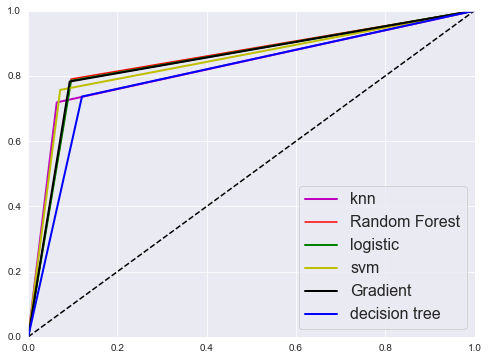

In [186]:
plt.figure(figsize=(16,6))
def plot_roc_curve(fpr_knn,tpr_knn,fpr_forest, tpr_forest,fpr_log,tpr_log,fpr_gaus, tpr_gaus,fpr_svc,tpr_svc,
                   fpr_Gradient, tpr_Gradient,fpr_decision, tpr_decision,label=None):
    plt.figure(figsize=(8, 6))
    plt.plot([0,1],[0, 1], 'k--') # dashed diagonal
    plt.plot(fpr_knn, tpr_knn, "m", linewidth=2, label="knn")
    plt.plot(fpr_forest, tpr_forest,'r' ,label="Random Forest")
    plt.plot(fpr_log, tpr_log,'g',linewidth=2, label='logistic')
    plt.plot(fpr_svc, tpr_svc,'y',linewidth=2, label='svm')
    plt.plot(fpr_Gradient, tpr_Gradient,'k',linewidth=2, label='Gradient')
    plt.plot(fpr_decision, tpr_decision,'b',linewidth=2, label='decision tree')
    plt.axis([0, 1, 0, 1])

    plt.grid(True)
    plt.legend(loc="lower right", fontsize=16)
plot_roc_curve(fpr_knn,tpr_knn,fpr_forest,tpr_forest,fpr_log,tpr_log,fpr_gaus, tpr_gaus,fpr_svc, tpr_svc,fpr_Gradient,
               tpr_Gradient,fpr_decision,tpr_decision)
plt.show()

In [193]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest','Decision Tree',
              'GaussianNB','GradientBoosting'],
    'Training Accuracy': [SVM_accuracy.mean()*100,knn_accuracy.mean()*100,log_accuracy.mean()*100, forest_accuracy.mean()*100,
                       decision_accuracy.mean()*100, gaus_accuracy.mean()*100, Gradient_accuracy.mean()*100],
    'prediction Accuracy ': [decision_acc_pred, gaus_acc_pred, gradient_acc_pred, log_acc_pred, svc_acc_pred,
                             forest_acc_pred, knn_acc_pred]
    
})                             

In [195]:
models.sort_values(by='Training Accuracy', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,prediction Accuracy
GradientBoosting,87.009158,0.824427
Support Vector Machines,86.531136,0.851145
Logistic Regression,86.245421,0.851145
KNN,86.153846,0.851145
Random Forest,85.576923,0.862595
Decision Tree,84.049451,0.847328
GaussianNB,76.699634,0.835878


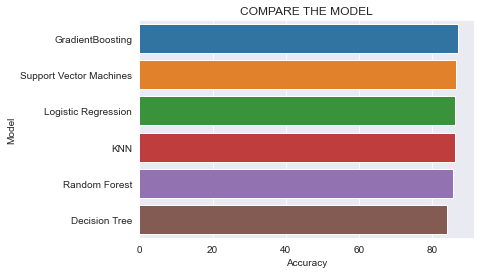

In [197]:
models=models.sort_values(by='Training Accuracy',ascending=False)[:6]

sns.barplot(y= 'Model', x= 'Training Accuracy', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('Accuracy')
plt.ylabel('Model');

# CHECKING FOR THE USER INPUT

In [198]:
input=[[44,10000,0,1,0,0,0,1,1,0,0,0,0,0,0,1]]
status=SVM_tuned.predict(input)
print("The status is:")
if(status==0):
    print("death")
else:
    print("Survival")

The status is:
Survival
